# XG Boost Trial file


In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error
import lime
import lime.lime_tabular
import time

In [2]:
X_train = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\X_train.csv")
X_test = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\X_test.csv")
Y_train = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\Y_train.csv")
Y_test = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\Y_test.csv")

In [3]:
from matplotlib import pyplot as plt

In [4]:


# Create the XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set the parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',  # Use squared error for regression
    'eval_metric': ['mae', 'rmse'],  # Mean Absolute Error as the evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of each tree
    'n_estimators': 30  # Number of boosting rounds (iterations)
}
# Start the timer
start_time = time.time()

# Train the XGBoost model and track the evaluation results
eval_results = {}
#model = xgb.train(params, dtrain, evals=[(dtrain, 'train'), (dtest, 'test')], evals_result=eval_results)
model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'], evals=[(dtrain, 'train'), (dtest, 'test')],
                  evals_result=eval_results, early_stopping_rounds=10)
# Calculate the time taken for training
end_time = time.time()
training_time = end_time - start_time

# Extract the evaluation results
train_mae = eval_results['train']['mae']
test_mae = eval_results['test']['mae']
train_rmse = eval_results['train']['rmse']
test_rmse = eval_results['test']['rmse']
num_rounds = len(train_mae)













[11:11:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-mae:0.29373	train-rmse:0.32675	test-mae:0.26261	test-rmse:0.30020
[1]	train-mae:0.26558	train-rmse:0.29550	test-mae:0.23757	test-rmse:0.27099
[2]	train-mae:0.24040	train-rmse:0.26744	test-mae:0.21492	test-rmse:0.24478
[3]	train-mae:0.21773	train-rmse:0.24205	test-mae:0.19382	test-rmse:0.22062
[4]	train-mae:0.19730	train-rmse:0.21922	test-mae:0.17475	test-rmse:0.19878
[5]	train-mae:0.17880	train-rmse:0.19869	test-mae:0.15785	test-rmse:0.17930
[6]	train-mae:0.16200	train-rmse:0.18016	test-mae:0.14424	test-rmse:0.16326
[7]	train-mae:0.14694	train-rmse:0.16358	test-mae:0.13057	test-rmse:0.14742
[8]	train-mae:0.13312	train-rmse:0.14855	test-mae:0.11741	test-rmse:0.13306
[9]	train-mae:0.12083	train-rmse:0.13502	test-mae:0.10713	test-rmse:0.12112
[10]	train-mae:0.10972	train-rmse:0.12

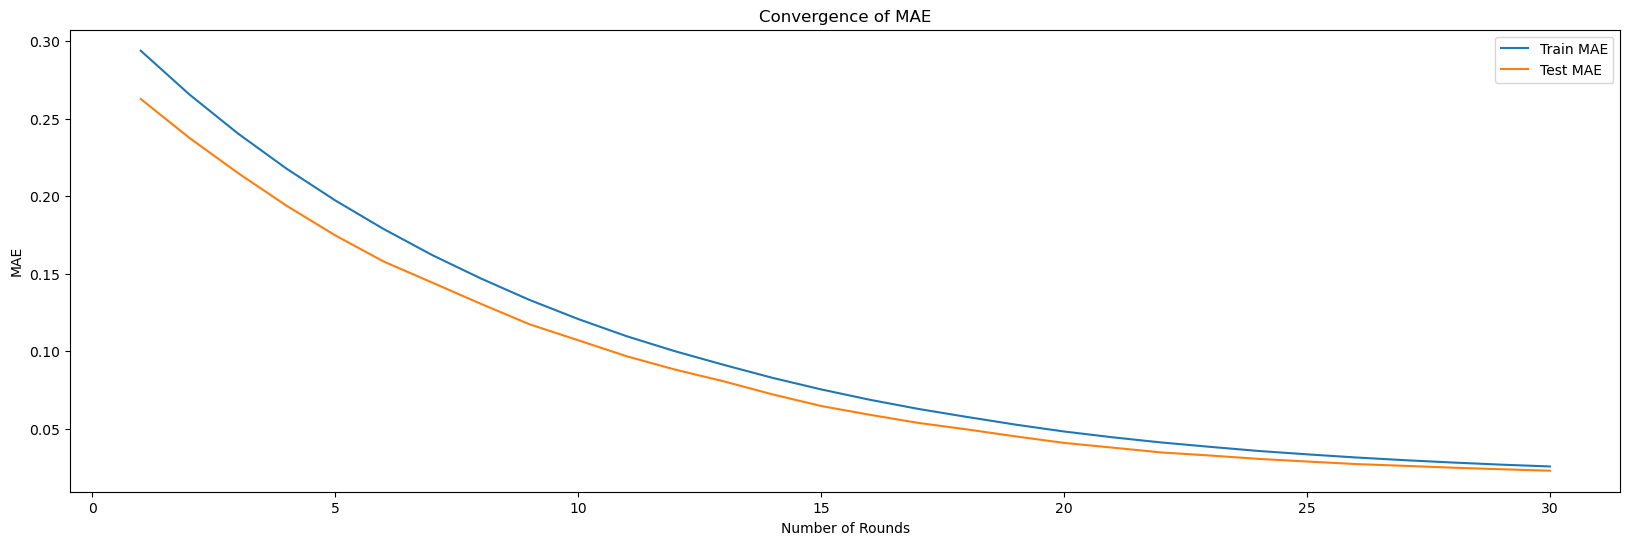

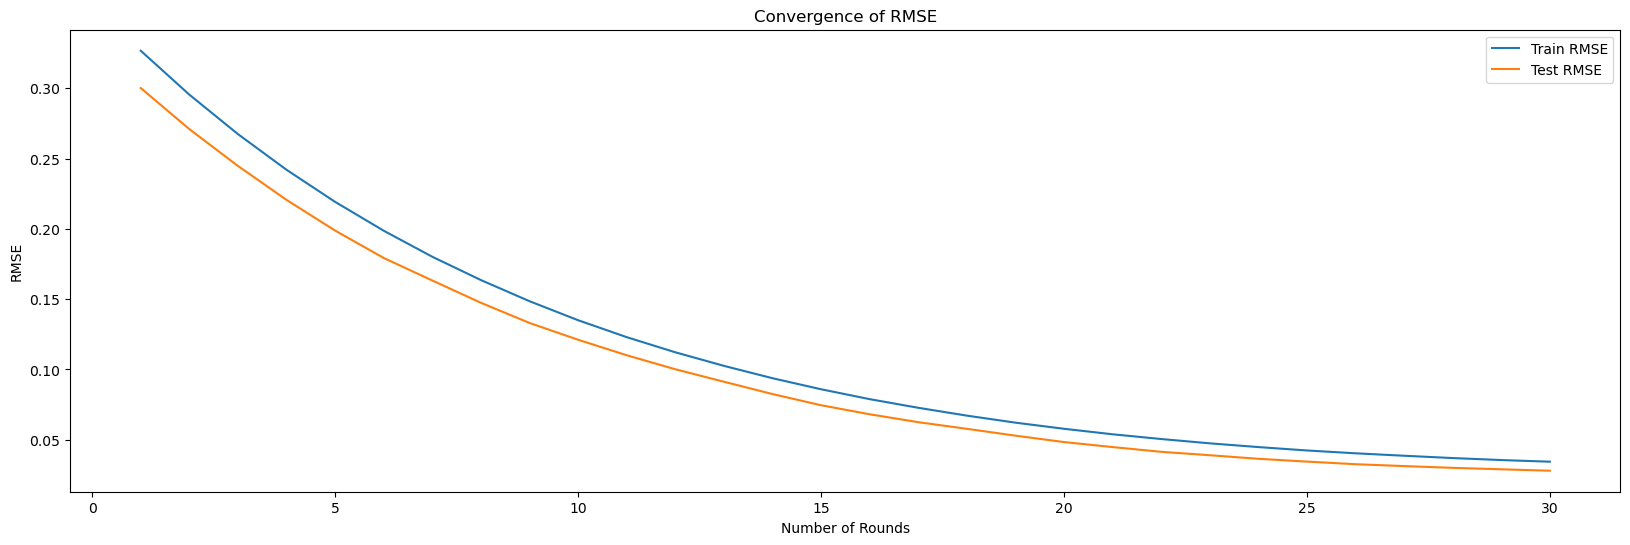

Predicted SOC: [0.9665319 0.9665319 0.9665319 ... 0.1437188 0.1437188 0.1437188]
MAE: 0.023016598309482404
RMSE: 0.027908036302262806
Training time: 6.152130842208862 seconds
Predicted SOC: [0.9665319 0.9665319 0.9665319 ... 0.1437188 0.1437188 0.1437188]


In [5]:

# Plot the convergence of MAE
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_rounds + 1), train_mae, label='Train MAE')
plt.plot(range(1, num_rounds + 1), test_mae, label='Test MAE')
plt.xlabel('Number of Rounds')
plt.ylabel('MAE')
plt.title('Convergence of MAE')
plt.legend()
plt.show()

# Plot the convergence of RMSE
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_rounds + 1), train_rmse, label='Train RMSE')
plt.plot(range(1, num_rounds + 1), test_rmse, label='Test RMSE')
plt.xlabel('Number of Rounds')
plt.ylabel('RMSE')
plt.title('Convergence of RMSE')
plt.legend()
plt.show()

# Use the trained model to make predictions
predictions = model.predict(dtest)

# Calculate MAE and RMSE on the test set
mae = mean_absolute_error(Y_test, predictions)
rmse = np.sqrt(mean_squared_error(Y_test, predictions))

print("Predicted SOC:", predictions)
print("MAE:", mae)
print("RMSE:", rmse)
print("Training time:", training_time, "seconds")
print("Predicted SOC:", predictions)

In [6]:

# Print the training time
print("Training time:", training_time, "seconds")

Training time: 6.152130842208862 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


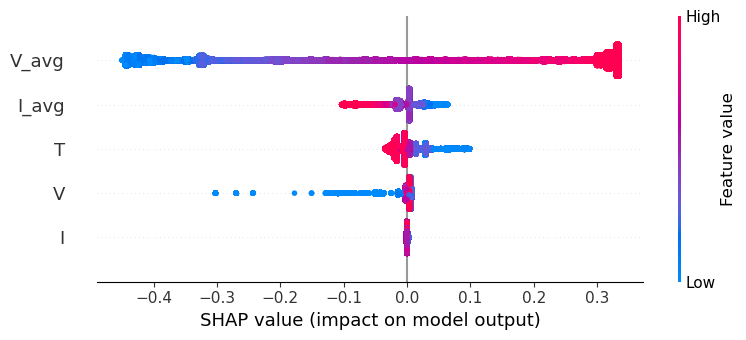

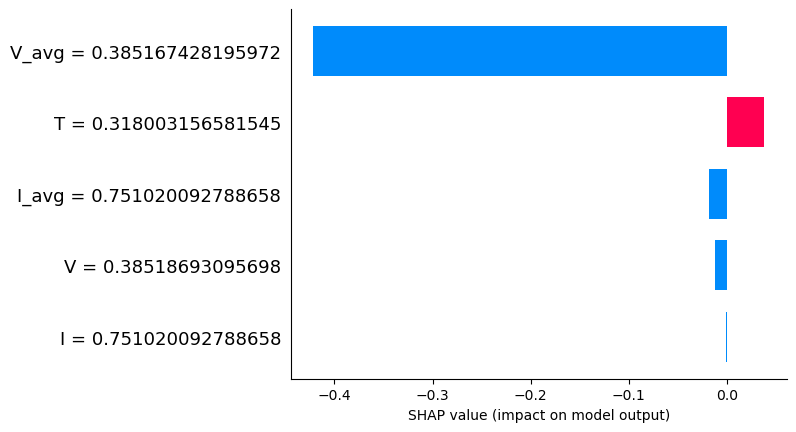

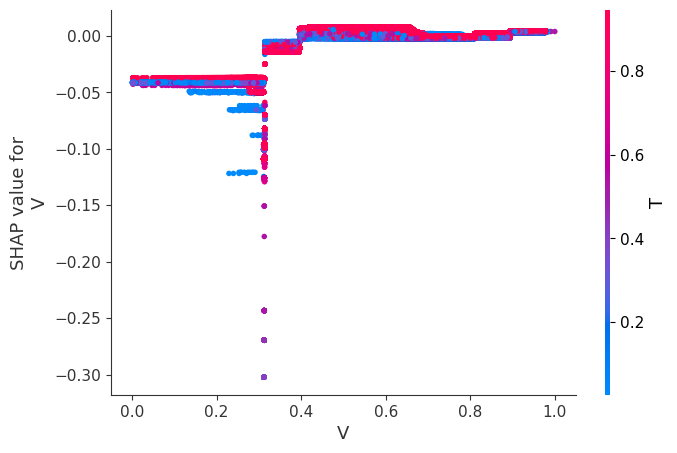

In [15]:
import numpy as np
import pandas as pd

import shap


# Create an explainer object with the trained model and feature names
explainer = shap.Explainer(model, feature_names=X_train.columns)

# Compute SHAP values for the predictors
shap_values = explainer.shap_values(X_train)

# Summary plot of the SHAP values
shap.summary_plot(shap_values, X_train)



# Bar plot for a single instance
shap.bar_plot(shap_values[0], sample_instance)

# Dependence plot for a single predictor
shap.dependence_plot('V', shap_values, X_train)



# Note: Make sure to have the 'shap' library installed (pip install shap)


In [17]:
# Force plot for a single instance
from IPython import get_ipython
# Initialize the JavaScript visualization
get_ipython().run_line_magic('matplotlib', 'inline')
shap.initjs()


sample_instance = X_train.iloc[10]  # Choose any instance from the training set
shap.force_plot(explainer.expected_value, shap_values[10], sample_instance)

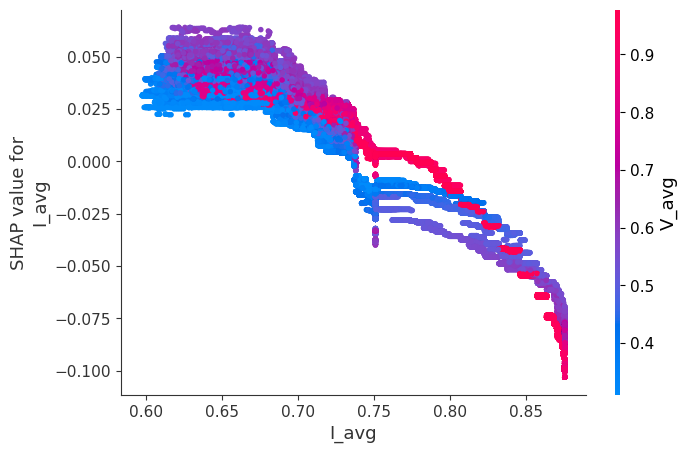

In [18]:
shap.dependence_plot('I_avg', shap_values, X_train)

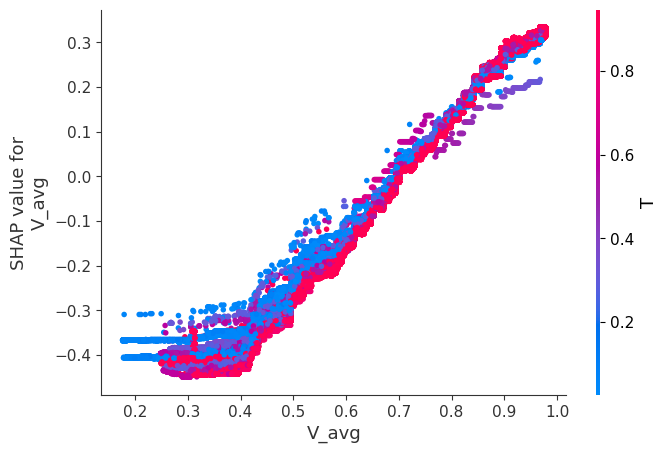

In [14]:
shap.dependence_plot('V_avg', shap_values, X_train)

Feature Importance Ranking:
1. V_avg: 0.9240844249725342
2. I_avg: 0.03854939714074135
3. T: 0.02597871981561184
4. V: 0.008940025232732296
5. I: 0.0024474910460412502


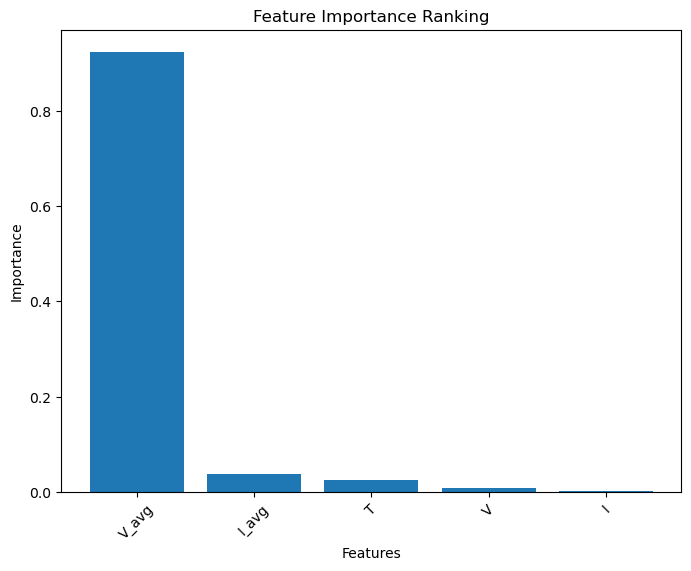

In [6]:
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
# Get the feature importance ranking
importance = model.feature_importances_
feature_names = X_train.columns

# Sort the features by importance in descending order
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Print the feature importance ranking
print("Feature Importance Ranking:")
for i, (feat, imp) in enumerate(zip(sorted_features, sorted_importance), 1):
    print(f"{i}. {feat}: {imp}")
    


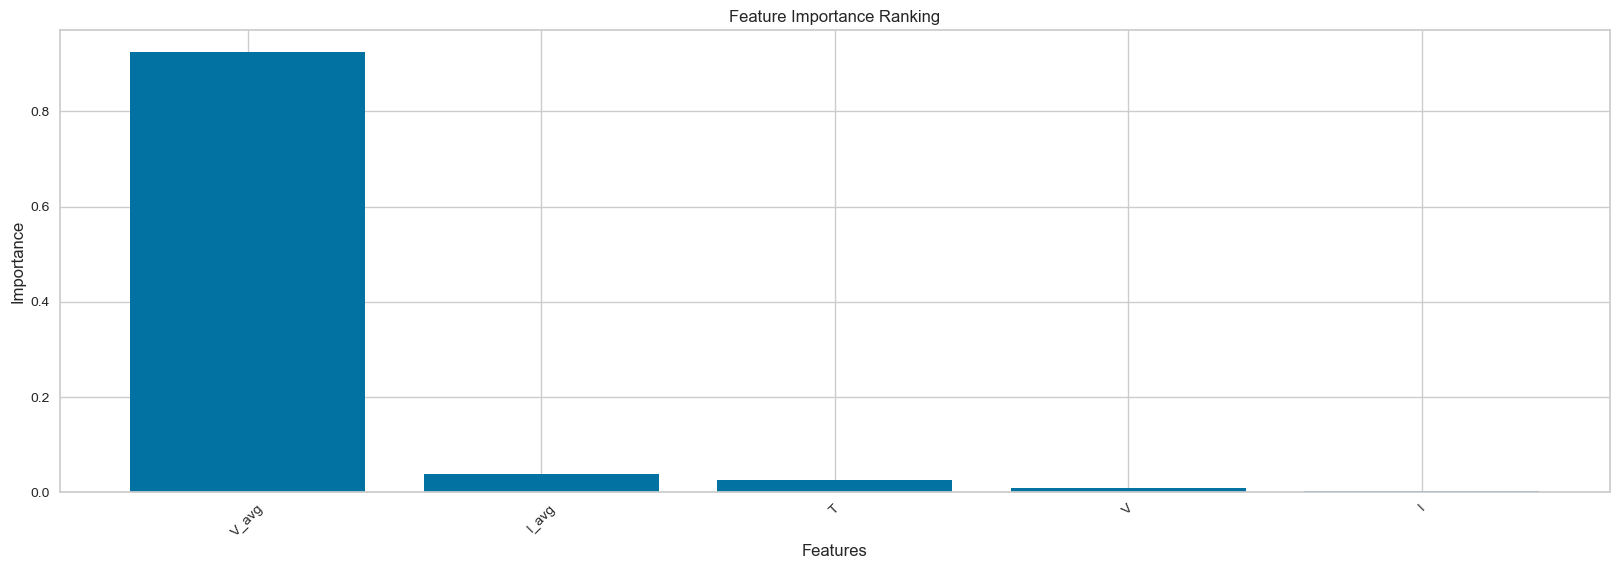

In [53]:
# Plot the feature importance ranking
plt.figure(figsize=(20, 6))
plt.bar(range(len(sorted_features)), sorted_importance)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Ranking")
plt.show()

In [19]:
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()
X_train_copy = X_train_copy.drop(columns=['V','I'])

X_train_copy.head()

,T,V_avg,I_avg
0,0.303101,0.385148,0.75102
1,0.304591,0.385150,0.75102
2,0.306081,0.385152,0.75102
3,0.307572,0.385154,0.75102
4,0.309062,0.385156,0.75102


In [20]:
X_test_copy = X_test_copy.drop(columns=['V','I'])
X_test_copy.head()

,T,V_avg,I_avg
0,0.920678,0.966960,0.748900
1,0.920677,0.966490,0.747946
2,0.917845,0.966294,0.747628
3,0.917845,0.966166,0.747496
4,0.917845,0.966066,0.747395


In [21]:
Y_train_copy=Y_train.copy()
Y_test_copy=Y_test.copy()

[11:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-mae:0.29373	train-rmse:0.32675	test-mae:0.26261	test-rmse:0.30020
[1]	train-mae:0.26558	train-rmse:0.29550	test-mae:0.23757	test-rmse:0.27099
[2]	train-mae:0.24040	train-rmse:0.26744	test-mae:0.21492	test-rmse:0.24478
[3]	train-mae:0.21773	train-rmse:0.24205	test-mae:0.19382	test-rmse:0.22062
[4]	train-mae:0.19730	train-rmse:0.21922	test-mae:0.17475	test-rmse:0.19878
[5]	train-mae:0.17880	train-rmse:0.19869	test-mae:0.15785	test-rmse:0.17930
[6]	train-mae:0.16199	train-rmse:0.18016	test-mae:0.14423	test-rmse:0.16324
[7]	train-mae:0.14694	train-rmse:0.16359	test-mae:0.13056	test-rmse:0.14740
[8]	train-mae:0.13312	train-rmse:0.14857	test-mae:0.11739	test-rmse:0.13304
[9]	train-mae:0.12083	train-rmse:0.13504	test-mae:0.10705	test-rmse:0.12105
[10]	train-mae:0.10972	train-rmse:0.12

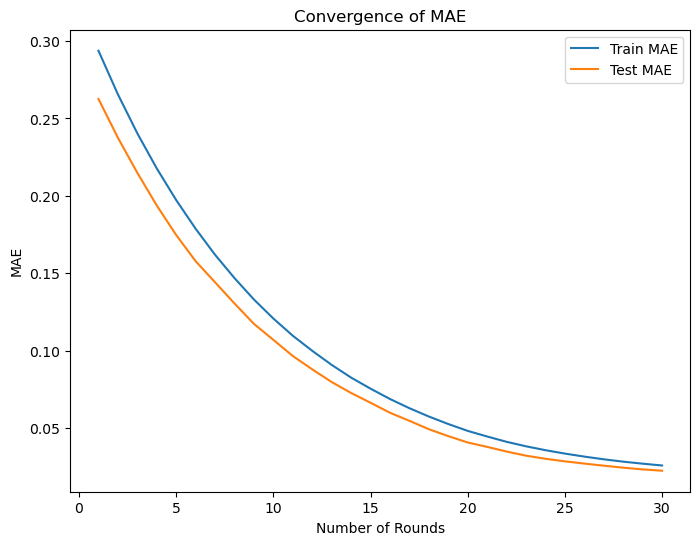

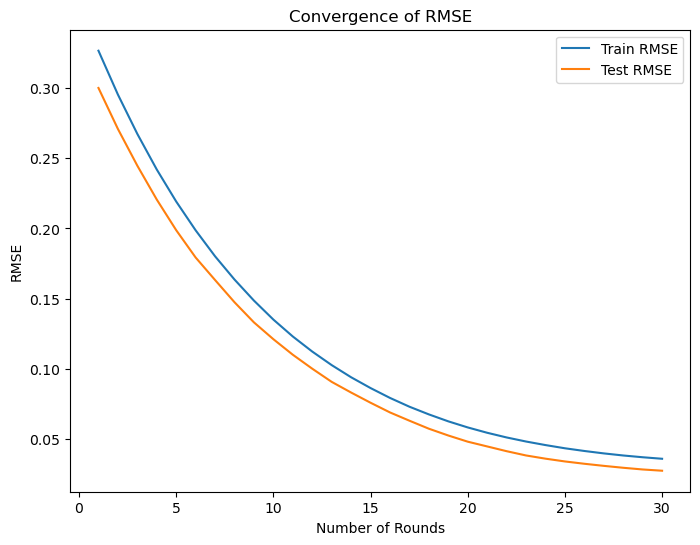

Predicted SOC: [0.9644615  0.9644615  0.9644615  ... 0.14640458 0.14640458 0.14640458]
MAE: 0.022590758755724954
RMSE: 0.027269160112720337
Training time: 5.738412141799927 seconds
Predicted SOC: [0.9644615  0.9644615  0.9644615  ... 0.14640458 0.14640458 0.14640458]


In [22]:

# Create the XGBoost DMatrix
dtrain = xgb.DMatrix(X_train_copy, label=Y_train_copy)
dtest = xgb.DMatrix(X_test_copy, label=Y_test_copy)

# Set the parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',  # Use squared error for regression
    'eval_metric': ['mae','rmse'],  # Mean Absolute Error as the evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of each tree
    'n_estimators': 30  # Number of boosting rounds (iterations)
}
# Start the timer
start_time = time.time()

# Train the XGBoost model and track the evaluation results
eval_results = {}
#model = xgb.train(params, dtrain, evals=[(dtrain, 'train'), (dtest, 'test')], evals_result=eval_results)
model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'], evals=[(dtrain, 'train'), (dtest, 'test')],
                  evals_result=eval_results, early_stopping_rounds=5)
# Calculate the time taken for training
end_time = time.time()
training_time = end_time - start_time

# Extract the evaluation results
train_mae_2 = eval_results['train']['mae']
test_mae_2 = eval_results['test']['mae']
train_rmse_2 = eval_results['train']['rmse']
test_rmse_2 = eval_results['test']['rmse']
num_rounds = len(train_mae_2)

# Plot the convergence of MAE
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_rounds + 1), train_mae_2, label='Train MAE')
plt.plot(range(1, num_rounds + 1), test_mae_2, label='Test MAE')
plt.xlabel('Number of Rounds')
plt.ylabel('MAE')
plt.title('Convergence of MAE')
plt.legend()
plt.show()

# Plot the convergence of RMSE
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_rounds + 1), train_rmse_2, label='Train RMSE')
plt.plot(range(1, num_rounds + 1), test_rmse_2, label='Test RMSE')
plt.xlabel('Number of Rounds')
plt.ylabel('RMSE')
plt.title('Convergence of RMSE')
plt.legend()
plt.show()

# Use the trained model to make predictions
predictions = model.predict(dtest)

# Calculate MAE and RMSE on the test set
mae = mean_absolute_error(Y_test, predictions)
rmse = np.sqrt(mean_squared_error(Y_test, predictions))

print("Predicted SOC:", predictions)
print("MAE:", mae)
print("RMSE:", rmse)
print("Training time:", training_time, "seconds")
print("Predicted SOC:", predictions)



In [23]:

# Print the training time
print("Training time:", training_time, "seconds")

Training time: 5.738412141799927 seconds


In [42]:
#LIME

import lime
import lime.lime_tabular

In [51]:
# Convert DataFrame inputs to NumPy arrays

explainer= lime.lime_tabular.LimeTabularExplainer(dtrain, feature_names=['V', 'I', 'T', 'V_avg', 'I_avg'], class_names=['target'], mode='regression')
# Select a random instance from the test set
random_instance_idx = np.random.randint(len(X_test))

# Explain the instance using LIME
explanation = explainer.explain_instance(dtest_arr[random_instance_idx], model.predict, num_features=5)
#explanation = explainer_lime.explain_instance(instance, model.predict, num_features=len(X_train.columns))

AttributeError: 'DMatrix' object has no attribute 'shape'

In [17]:
import eli5
from eli5 import explain_weights
import interpret
from interpret.glassbox import ExplainableBoostingRegressor
import yellowbrick
from yellowbrick.regressor import ResidualsPlot

Explanation(estimator='XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=None, max_bin=None,\n             max_cat_threshold=None, max_cat_to_onehot=None,\n             max_delta_step=None, max_depth=None, max_leaves=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             n_estimators=100, n_jobs=None, num_parallel_tree=None,\n             predictor=None, random_state=None, ...)', description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=True, targets=None, feature_importances=FeatureImportances(importa

ValueError: Unable to coerce to Series, length must be 1: given 669956

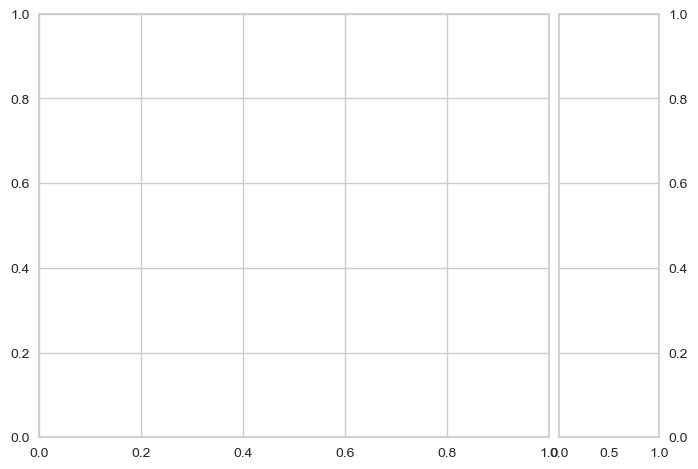

In [18]:
# Feature Importance using Eli5
feature_importance = explain_weights(model)
print(feature_importance)

# Feature Importance using InterpretML
interpretable_model = ExplainableBoostingRegressor()
interpretable_model.fit(X_train, Y_train)
feature_importance = interpretable_model.explain_global()
print(feature_importance)

# Residuals Plot using Yellowbrick
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_train, Y_train)
visualizer.show()